Recap:
In this activity, Maximum Likelihood is used to estimate the parameters of a linear regression model, by converting the regression model to a conditional probability problem. MLE uses a likelihood function to compute the probability of observing data under the model parameters (see lec6 slides). 

Likelihood function : $𝐿(𝜃|𝑋)$, where $𝜃$ represents the parameters of the likelihood function including the weights of the linear regression (prediction) model and the residual error variance:

$𝐿(𝜃|𝑋)= \prod_{i=1}^{n} \left[ \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_i - g(x_i))^2}{2\sigma^2} \right) \right] $
 

To compute Negative of the Log of Likelihood (NLL), given that $\log(a.b) = \log a + \log b$:

$-\log𝐿(𝜃|𝑋)= -\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right]$

Let's now say we change the weights of our model multiple times, and each time we change the weights, a new NLL is obtained given the weights of the model. To find the optimal weights that corresponds to the minimum NLL, we take the gradient of the NLL function wrt the parameters of the model and set to 0:

$\frac{\partial \mathcal({-logL}(\theta | X))}{\partial \theta} = 0$

$\frac{\partial \mathcal(-\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right])}{\partial \theta} = 0$

$\frac{\partial \mathcal(-\sum_{i=1}^{n} \log \left[ L(\theta | X_i) \right])}{\partial \theta} = 
   \frac{\partial \mathcal ( 0.5\sum_{i=1}^{n} [\log (2\pi\sigma^2) + \frac{{(y_i - wx_i)^2}}{{\sigma^2}}] )} {\partial \theta} = 0$

Lab2: This lab activity has 2 parts. 
- Part1) In this part you are asked to use the generated synthetic data in Step 1 (consider this as the training dataset), and manually calculate the NLL values corresponding to the provided weights in Step 2 and 3. Report the best model based on the computed NLL both in the given code and in your computation and see if they match (match between your work and the result of the provided code in this lab). You can use a calculator in your computations. 

X: [5.48813504 7.15189366 6.02763376 5.44883183 4.23654799 6.45894113
 4.37587211 8.91773001 9.63662761 3.83441519 7.91725038 5.2889492
 5.68044561 9.25596638 0.71036058 0.871293   0.20218397 8.32619846
 7.78156751 8.70012148]
y: [13.47034915 15.09862906 13.36833522 11.04356792  6.92010617 14.57150086
 10.61618042 18.093295   22.54300983  7.2144647  16.88025928 11.39071455
 13.89367044 20.98129154  2.57566859  3.12074851  0.5165822  15.67160044
 16.21522287 18.55659193]


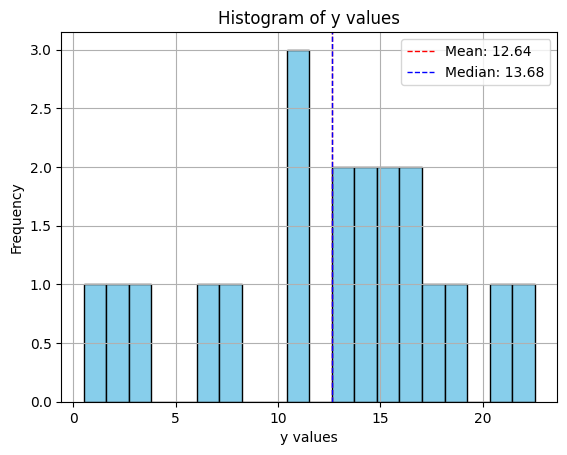

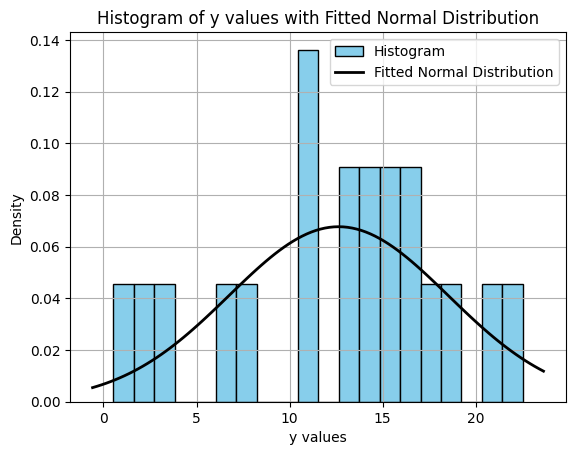

In [8]:
#Step 1: Generating Synthetic Data and visualizing the probability distribution of data

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Generating Synthetic Data
np.random.seed(0)  # Set seed for reproducibility
num_samples = 20
X = np.random.uniform(0, 10, num_samples)  # Generate random X values
true_slope = 2
true_intercept = 1
noise = np.random.normal(0, 1, num_samples)  # Add random noise
y = true_slope * X + true_intercept + noise  # Generate y values with linear relationship


# Plot histogram of y values
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('y values')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
# Calculate and plot the mean of y
mean_y = np.mean(y)
median_y = np.median(y)
plt.axvline(mean_y, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_y:.2f}')
plt.axvline(mean_y, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_y:.2f}')
plt.legend()
plt.grid(True)
plt.show()



# Plot histogram of y values
plt.hist(y, bins=20, color='skyblue', edgecolor='black', density=True, label='Histogram')
plt.xlabel('y values')
plt.ylabel('Density')
plt.title('Histogram of y values with Fitted Normal Distribution')

# Fit a normal distribution to the data
mu, std_dev = norm.fit(y)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

plt.legend()
plt.grid(True)
plt.show()



In [1]:
#Step 2: Implementing Negative Log-Likelihood Function

import numpy as np

def negative_log_likelihood(X, y, weights):
    """
    Compute the negative log-likelihood of the data given the weights of the linear regression model.

    Parameters:
        X (ndarray): Independent variable (features) matrix with shape (num_samples, num_features).
        y (ndarray): Dependent variable (response) vector with shape (num_samples,).
        weights (ndarray): Coefficients (including intercept) of the linear regression model.

    Returns:
        float: Negative log-likelihood value.
    """
    # Calculate predicted y values
    # performs the linear combination of weights and input attributes X to obtain the predictions
    # This is performed on training data
    y_pred = np.dot(X, weights)
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Calculate negative log-likelihood (assuming normally distributed errors)
    nll = 0.5 * np.sum(np.log(2 * np.pi * np.var(residuals)) + (residuals ** 2) / np.var(residuals))
    
    return nll


In [22]:
# Step 3: Obtaining the model with the minimum log likelihood

print("X:", X)
print("y:", y)

# Add bias term (column of 1 values (x0)) to X 
X_with_bias = np.column_stack((np.ones_like(X), X))
# Initialize weights randomly
initial_weights = np.random.randn(X_with_bias.shape[1])

print("nll:{}, weights:{}".format(negative_log_likelihood(X_with_bias, y, initial_weights),initial_weights ))

# Define the number of times to change the weights
num_changes = 5

for i in range(num_changes):
    # Generate new random weights
    new_weights = np.random.randn(X_with_bias.shape[1])
    # Compute the negative log-likelihood for the new weights
    print("nll:{}, weights:{}".format(negative_log_likelihood(X_with_bias, y, new_weights),new_weights))


X: [5.48513234 7.15189366 6.02763376 5.44883183 4.23654799 6.45894113
 4.37587211 8.91773001 9.63662761 3.83441519 7.91725038 5.2889492
 5.68044561 9.25596638 0.71036058 0.871293   0.20218397 8.32619846
 7.78156751 8.70012148]
y: [13.4783415  15.09862906 13.36833522 11.04357692  6.92010617 14.57150086
 10.61681042 18.0939295  22.54        7.2146447  16.88025928 11.39074155
 13.89637044 20.09821954  2.57566859  3.12074851  0.51658832 15.67600444
 16.21228227 18.55651993]
nll:60.15902520163725, weights:[0.01050002 1.78587049]
nll:105.03879218649342, weights:[0.12691209 0.40198936]
nll:111.48267638755614, weights:[ 1.8831507  -1.34775906]
nll:116.05457517388243, weights:[-1.270485    0.96939671]
nll:74.97435258645163, weights:[-1.17312341  1.94362119]
nll:118.31282073089562, weights:[-0.41361898 -0.74745481]


In [24]:
import numpy as np

# The provided X values, weights, and actual y value
X = np.array([
    5.48513234, 7.15189366, 6.02763376, 5.44883183, 4.23654799, 6.45894113, 
    4.37587211, 8.91773001, 9.63662761, 3.83441519, 7.91725038, 5.2889492, 
    5.68044561, 9.25596638, 0.71036058, 0.871293, 0.20218397, 8.32619846, 
    7.78156751, 8.70012148
])
y = np.array([
    13.4783415, 15.09862906, 13.36833522, 11.04357692, 6.92010617, 14.57150086, 
    10.61681042, 18.0939295, 22.54, 7.2146447, 16.88025928, 11.39074155, 
    13.89637044, 20.09821954, 2.57566859, 3.12074851, 0.51658832, 15.67600444, 
    16.21228227, 18.55651993
])
weights = np.array([0.01050002, 1.78587049])

# Calculate predicted y values using the weights
X_with_bias = np.column_stack((np.ones_like(X), X))  # Add bias term (intercept)
y_pred = np.dot(X_with_bias, weights)

# Calculate residuals
residuals = y - y_pred

# Calculate variance of the residuals
variance = np.var(residuals)

# Calculate negative log-likelihood
nll = negative_log_likelihood(X_with_bias, y, weights)

print("Variance of residuals:", variance)
print("Negative log-likelihood:", nll)

Variance of residuals: 1.9064588163824752
Negative log-likelihood: 60.15902560436864


$r_1=13.4783415-(0.01050002+1.78587049*5.48513234)=3.67210550025$

$r_2=15.09862906-(0.01050002+1.78587049*7.15189366)=2.31577320499$

$r_3=13.36833522-(0.01050002+1.78587049*6.02763376)=2.59326194349$

$r_4=11.04357692-(0.01050002+1.78587049*5.44883183)=1.30216892983$

$r_5=6.92010617-(0.01050002+1.78587049*4.23654799)=-0.65631988481$

$r_6=14.57150086-(0.01050002+1.78587049*6.45894113)=3.02616847929$

$r_7=10.61681042-(0.01050002+1.78587049*4.37587211)=2.79156953074$

$r_8=18.0939295-(0.01050002+1.78587049*8.91773001)=2.15751861735$

$r_9=22.54-(0.01050002+1.78587049*9.63662761)=5.31973110818$

$r_{10}=7.2146447-(0.01050002+1.78587049*3.83441519)=0.35637574577$

$r_{11}=16.88025928-(0.01050002+1.78587049*7.91725038)=2.73057544442$

$r_{12}=11.39074155-(0.01050002+1.78587049*5.2889492)=1.93486323061$

$r_{13}=13.89637044-(0.01050002+1.78587049*5.68044561)=3.74133023505$

$r_{14}=20.09821954-(0.01050002+1.78587049*9.25596638)=3.55776230553$

$r_{15}=2.57566859-(0.01050002+1.78587049*0.71036058)=1.29655657292$

$r_{16}=3.12074851-(0.01050002+1.78587049*0.871293)=1.55423203316$

$r_{17}=0.51658832-(0.01050002+1.78587049*0.20218397)=0.14501391442$

$r_{18}=15.67600444-(0.01050002+1.78587049*8.32619846)=0.7959922964$

$r_{19}=16.21228227-(0.01050002+1.78587049*7.78156751)=2.30491046795$

$r_{20}=18.55651993-(0.01050002+1.78587049*8.70012148)=3.00872969945$

$SSR=r_1^2+r_2^2+r_3^2+r_4^2+r_5^2+r_6^2+r_7^2+r_8^2+r_9^2+r_{10}^2+r_{11}^2+r_{12}^2+r_{13}^2+r_{14}^2+r_{15}^2+r_{16}^2+r_{17}^2+r_{18}^2+r_{19}^2+r_{20}^2=$
$3.67210550025^2+2.31577320499^2+2.59326194349^2+1.30216892983^2-0.65631988481^2
+3.02616847929^2+2.79156953074^2+2.15751861735^2+5.31973110818^2
+0.35637574577^2+2.73057544442^2+1.93486323061^2+3.74133023505^2+3.55776230553^2
+1.29655657292^2+1.55423203316^2+0.14501391442^2+0.7959922964^2+2.30491046795^2
+3.00872969945^2 = 134.70191512193153$

$n=20
𝜎^2=1.9064588163824752
𝑆𝑆𝑅=134.70191512193153
NLL=0.5⋅20⋅log(2π⋅1.9064588163824752)+\frac{134.70191512193153}{2*1.9064588163824752}
log(11.976841545117372)≈2.484906649
NLL=0.5×20×2.484906649+\frac{134.70191512193153}{2*1.9064588163824752}$

Then we calculate each part:

$0.5×20×2.484906649=24.84906649$

and $\frac{134.70191512193153}{2*1.9064588163824752}≈35.3099591146037$

Finally, add these two parts:

we got NLL=24.84906649+35.3099591146037≈60.1590256046037 for the weights = [0.01050002, 1.78587049] which is match with the result we have got from the part 3.

-Part 2: The following code is provided to you to understand how full-batch-gradient-descent and stochastic-gradient-descent is implementes to optimize the training of a regression model, using california housing dataset. Study the code by going through the implementation and provide a high-level algorithm corresponding to the solution given below. Make sure that your algorithm is conceptually aligned with the topics discussed in the lecture. Next, explain the trend visualized by the code and describe the implications of the plot. Create a new "Code" cell below the results, and copy and paste the provided code. Then manipluate the code to provide a visualized comparison between SGD, BGD, and Mini-BGD using different batch sizes 2, 5, 7, 10 for 20 epochs. Report your analysis. 

dataset size:20640
BGD MSE: 7.937989118740751
SGD MSE: 14.53307311021228


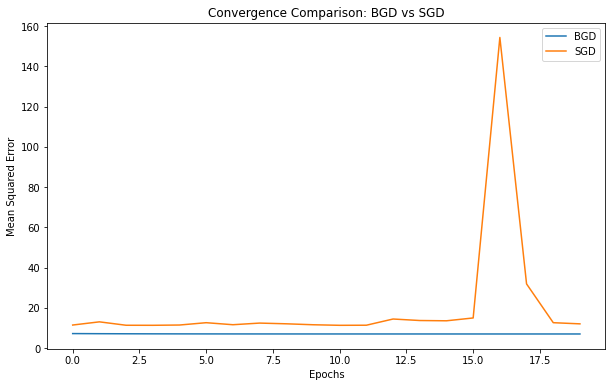

In [6]:

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target
print("dataset size:{}".format(X.shape[0]))

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Stansdardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, lr=0.01, epochs=20, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        m = X.shape[0]
        loss_history = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error) 
                avg_gradient = sum(gradient)/ X_batch.shape[0]
            
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient

            # print the Mean Squared Error (MSE) and store it in the loss_history list at certain intervals during the training process. 
            
            y_train_pred = X.dot(self.theta)
            mse = mean_squared_error(y, y_train_pred)
            loss_history.append(mse)
                
        
        return loss_history

# Batch Gradient Descent (BGD)
bgd_model = LinearRegression()
bgd_loss_history = bgd_model.fit(X_train_scaled, y_train)

# Stochastic Gradient Descent (SGD)
sgd_model = LinearRegression()
sgd_loss_history = sgd_model.fit(X_train_scaled, y_train, batch_size=1)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = X_test.dot(model.theta)
    mse = mean_squared_error(y_test, y_pred)
    return mse

bgd_mse = evaluate_model(bgd_model, X_test_scaled, y_test)
sgd_mse = evaluate_model(sgd_model, X_test_scaled, y_test)

print("BGD MSE:", bgd_mse)
print("SGD MSE:", sgd_mse)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(bgd_loss_history, label='BGD')
plt.plot(sgd_loss_history, label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Comparison: BGD vs SGD')
plt.legend()
plt.show()


BGD MSE: 9.34979979257049
SGD MSE: 27.204302551445604
MBGD (Size 2) Final MSE: 10.0618214875048
MBGD (Size 5) Final MSE: 2.308221166918901
MBGD (Size 7) Final MSE: 21.75625960877253
MBGD (Size 10) Final MSE: 9.4101948201586


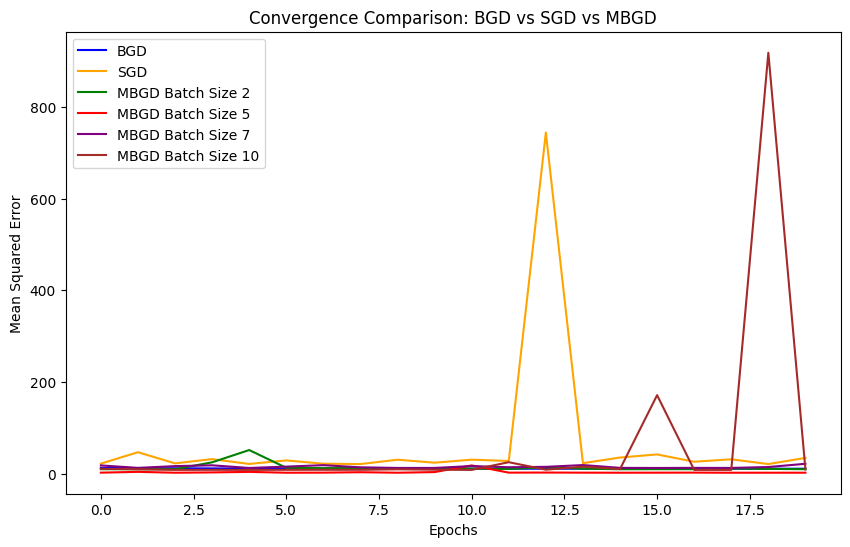

In [35]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

# Splitting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, lr=0.01, epochs=20, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        m = X.shape[0]
        loss_history = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error) 
                avg_gradient = sum(gradient)/ X_batch.shape[0]
            
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient

            # print the Mean Squared Error (MSE) and store it in the loss_history list at certain intervals during the training process. 
            
            y_train_pred = X.dot(self.theta)
            mse = mean_squared_error(y, y_train_pred)
            loss_history.append(mse)
                
        
        return loss_history

# Batch Gradient Descent (BGD)
bgd_model = LinearRegression()
bgd_loss_history = bgd_model.fit(X_train_scaled, y_train)

# Stochastic Gradient Descent (SGD)
sgd_model = LinearRegression()
sgd_loss_history = sgd_model.fit(X_train_scaled, y_train, batch_size=1)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = X_test.dot(model.theta)
    mse = mean_squared_error(y_test, y_pred)
    return mse

bgd_mse = evaluate_model(bgd_model, X_test_scaled, y_test)
sgd_mse = evaluate_model(sgd_model, X_test_scaled, y_test)

print("BGD MSE:", bgd_mse)
print("SGD MSE:", sgd_mse)

# Mini-Batch Gradient Descent (MBGD) with different batch sizes
batch_sizes = [2, 5, 7, 10]
mini_bgd_loss_histories = {}

for batch_size in batch_sizes:
    mini_bgd_model = LinearRegression()
    loss_history = mini_bgd_model.fit(X_train_scaled, y_train, epochs=20, batch_size=batch_size)
    mini_bgd_loss_histories[batch_size] = loss_history
    print(f"MBGD (Size {batch_size}) Final MSE:", loss_history[-1])

# Model Evaluation and Visualization in one graph
plt.figure(figsize=(10, 6))
plt.plot(bgd_loss_history, label='BGD', color='blue')
plt.plot(sgd_loss_history, label='SGD', color='orange')

# Plot for MBGD with various batch sizes
colors = ['green', 'red', 'purple', 'brown']  # Define more colors if necessary
for batch_size, color in zip(batch_sizes, colors):
    plt.plot(mini_bgd_loss_histories[batch_size], label=f'MBGD Batch Size {batch_size}', color=color)
     
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Comparison: BGD vs SGD vs MBGD')
plt.legend()
plt.show()


code analysis:

* The code begins by loading the California housing dataset, which is a common dataset for the regression tasks.
* The dataset is split into the training for 80% and test sets for 20% and using a random seed for the reproducibility (random_state=42).
* The features of the dataset are standardized by using the StandardScaler, which it removes the mean and scales the features to unit the variance. This is a improtant step for gradient descent to work efficiently, as it ensures all features contribute equally to the error gradient.
on the Linear Regression Model
* A LinearRegression class is defined to encapsulate the model. And it has a __init__ method that use to initializes the weights to None.
* The fit method is responsible for training the model. It takes in the features (X), targets (y), learning rate (lr), number of epochs, and the batch size. If the batch size is None, then the algorithm will performs BGD; otherwise, it will performs SGD or MBGD and it will depending on the batch size.
* Weights are initialized with a normal distribution (np.random.randn), which is a common initialization method.
* For each of the epoches, the code potentially performs multiple updates to the weights depending on the batch size:
BGD: Uses the full dataset to perform one update per epoch.
SGD: Treats each data point as a mini-batch (batch_size=1) and updates weights for each sample.
MBGD: Uses a specified batch_size to create mini-batches and perform multiple updates per epoch.
* The gradient of the mean squared error loss function with respect to the weights is calculated as 2 * X_batch.T.dot(error).
* The average gradient across the batch is used to update the weights, scaled by the learning rate.
* The code uses mse = mean_squared_error(y, y_train_pred) to calculate the MSE for the predictions at the end of each epoch, which is stored in loss_history.
* The code explicitly trains BGD and SGD models for 10 epochs. It prints out their final MSE values on the test set.
* The code then trains four MBGD models with different batch sizes ([2, 5, 7, 10]) for 20 epochs and prints out their final MSE values on the test set.
* The matplotlib.pyplot library is used to plot the loss history of each model. This visualization can help compare the rate of convergence and the stability of each model during training.
* The LinearRegression class does not have a method for making predictions with the trained model, which could be useful for validating the model on new data.
* The learning rate is fixed at 0.01, which it may not be optimal for all variants of gradient descent or datasets. An adaptive learning rate could be beneficial.
* The code does not implement to any regularization, which it could help with overfitting, especially for datasets with many features.
* There is no early stopping mechanism, so the model will train for the full number of epochs, even if it has already converged to a solution.
* The code is a straightforward to the implementation of the gradient descent for linear regression, demonstrating BGD, SGD, and MBGD.
* It provides a basic structure for us to understanding about how different that batch sizes can impact the training process and convergence of gradient descent algorithms.
* The loss plots generated by the code are important for analyzing the performance of the models and for the tuning hyperparameters.